In [3]:
import cv2
import numpy as np
import torch
from segment_anything import sam_model_registry, SamPredictor
from glob import glob
import os

# Load SAM model
sam_checkpoint = "sam_vit_h_4b8939.pth"  # Download from official repo
model_type = "vit_h"
device = "cuda" if torch.cuda.is_available() else "cpu"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
predictor = SamPredictor(sam)

def save_segmented_with_alpha(image_path, mask, out_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return
    if image.shape[2] == 3:
        # Add alpha channel if not present
        image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
    # Ensure mask is uint8 and 0/255
    alpha = (mask * 255).astype(np.uint8)
    image[:, :, 3] = alpha
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    cv2.imwrite(out_path, image)

def segment_and_save(image_path, out_mask_path, out_segmented_path, out_alpha_path=None):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    predictor.set_image(image_rgb)
    masks, scores, _ = predictor.predict(
        point_coords=None,
        point_labels=None,
        multimask_output=True
    )
    
    print(masks)
    print(scores)
    # Take the mask with highest score
    # best_mask = masks[np.argmax(scores)]
    
    # largest_mask = masks[np.argmax([np.sum(m) for m in masks])]
    # # Invert mask if it covers more than half the image (likely background)
    # if np.sum(largest_mask) > 0.5 * largest_mask.size:
    #     silhouette_mask = np.logical_not(largest_mask)
    # else:
    #     silhouette_mask = largest_mask
    # # Ensure output directories exist
    # os.makedirs(os.path.dirname(out_mask_path), exist_ok=True)
    # os.makedirs(os.path.dirname(out_segmented_path), exist_ok=True)
    # # Save mask
    # mask_uint8 = (silhouette_mask * 255).astype(np.uint8)
    # cv2.imwrite(out_mask_path, mask_uint8)
    # # Save segmented image (black background)
    # segmented = cv2.bitwise_and(image, image, mask=mask_uint8)
    # cv2.imwrite(out_segmented_path, segmented)
    # # Save segmented image with transparent background if requested
    # if out_alpha_path is not None:
    #     save_segmented_with_alpha(image_path, silhouette_mask, out_alpha_path)

def save_segmented_with_alpha(image_path, mask, out_path):
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return
    if image.shape[2] == 3:
        # Add alpha channel if not present
        image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)
    # Ensure mask is uint8 and 0/255
    alpha = (mask * 255).astype(np.uint8)
    image[:, :, 3] = alpha
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    cv2.imwrite(out_path, image)


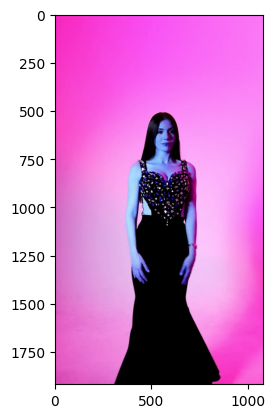

In [5]:
import cv2
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor

sam_checkpoint = "sam_vit_h_4b8939.pth"

img = cv2.imread("test.jpg")

predictor.set_image(img)

masks, scores, _ = predictor.predict()

In [4]:

# Example usage
for designer_folder in os.listdir("./images/"):
    designer_path = os.path.join("images/", designer_folder)
    print(designer_folder, designer_path)
    for product_folder in os.listdir(designer_path):
        product_path = os.path.join(designer_path, product_folder)
        if not os.path.isdir(product_path):
            # For .DS_Store files
            continue
        for img_name in os.listdir(product_path):
            base = os.path.splitext(os.path.basename(img_name))[0]
            out_mask = os.path.join(f"./segmented/{designer_folder}", f"{base}_mask.png")
            out_segmented = os.path.join(f"./segmented/{designer_folder}", f"{base}_segmented.png")
            img_path = os.path.join(product_path, img_name)
            print(out_mask, out_segmented)
            # print(img_path)
            segment_and_save(img_path, out_mask, out_segmented)
            break
            # break

marinakarelyan images/marinakarelyan
./segmented/marinakarelyan/4a4556bb9a364fafb4690320d070dede.thumbnail.0000000000_2048x_mask.png ./segmented/marinakarelyan/4a4556bb9a364fafb4690320d070dede.thumbnail.0000000000_2048x_segmented.png
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False Fal

KeyboardInterrupt: 